# On Animation
For the animation, I wanted to use [VPython/Glowscript](https://www.glowscript.org/) because of the simpicity of code, as shown in [Introduction to Vpython 2d graphs and animation - Python CodeMan (YouTube)](https://youtu.be/FQ5x-C85rLM), but I could not make it work in this notebook while using `VS Code`. Even in Jupyter, I had to restart the kernel to get the output of a changed cell. Hence I tried [Plotly](https://plotly.com/python), because it seem to be more suitable for web application (incl. [Jupyter](https://jupyter.org/) notebooks) and it seems to be simpler than [Matplotlib](https://www.matplotlib.org), especially with `plotly.express`. But the animation is pretty slow. Hence back to `Matplotlib`.

1. [Intro to Animations in Python](https://plotly.com/python/animations)
1. [Simulate + Animate Simple Pendulum in Python - Logan Dihel (YouTube)](https://youtu.be/WNJJuSWfuTY)

In [ ]:
import plotly.express as px

## Animation with `plotly.express` [1]

In [ ]:
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

## Animation with `plotly.graph_objects` [1]
So far no way to change "frame rate".

In [ ]:
import plotly.graph_objects as go
import numpy as np

In [ ]:
n = 64
t = np.linspace(0, 2*np.pi, num=n, endpoint=True)
x = np.sin(t)
y = np.cos(t)

In [ ]:
fig = go.Figure(
    data=[go.Scatter(x=[0, x[0]], y=[0, y[0]])],
    layout=go.Layout(
        xaxis=dict(range=[-1.5, 1.5], autorange=False),
        yaxis=dict(range=[-1.5, 1.5], autorange=False),
        title="Start Title",
        updatemenus=[dict(type="buttons", buttons=[dict(label="Play", method="animate", args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x = [0, x[i]], y = [0, y[i]])]) for i in range(n)]
)
fig.update_layout(width = 500, height = 500)

fig.show()

## Animation with [Matplotlib](https://matplotlib.org/stable/users/explain/animations/animations.html)

So far the GUI elements are missing, hence the animation can't be stopped. -> Save animation without display in cell.

In [24]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import Video

### Setup and preparations

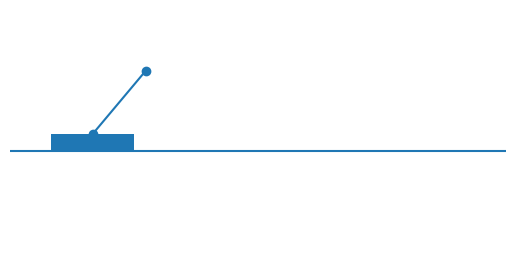

In [26]:
n = 64
t = np.linspace(0, 2*np.pi, num=n, endpoint=True)
x = np.sin(t)
y = np.cos(t)

xc, h_cart, w_cart = 0, 0.2, 1

fig, ax = plt.subplots()
ax.set(xlim=[-1, 5], ylim=[-1.5, 1.5])
ax.set_aspect('equal', 'box')
ax.axis("off")
ax.axhline(-h_cart)

# Cart & pendulum
cart = ax.bar(x=xc, height=h_cart, width=w_cart, bottom=-h_cart, align="center")
# [0] at the end is necessary to get first list element
line = ax.plot([xc, x[0]], [0, y[0]], marker = 'o')[0]
line.set_data([xc, x[7]], [0, y[7]])

### Animation -> Clip

In [27]:
def update(t):
    shift = t/20
    line.set_data([xc+shift, x[t]+xc+shift], [0, y[t]])
    cart.patches[0].set_x(-w_cart/2+shift)
    return (line, cart)

ani = animation.FuncAnimation(fig=fig, func=update, frames=n, interval=30)
ani.save("matplotlib.mp4")
Video("matplotlib.mp4")